Les algorithmes à tester sont : 
KNN ,
NB ,
XGBoost ,
GradientBoosting ,
AdaBoost ,
lightGBM

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("heart_2022_no_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [8]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [9]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

<Axes: title={'center': 'Répartition de la variable cible'}, ylabel='count'>

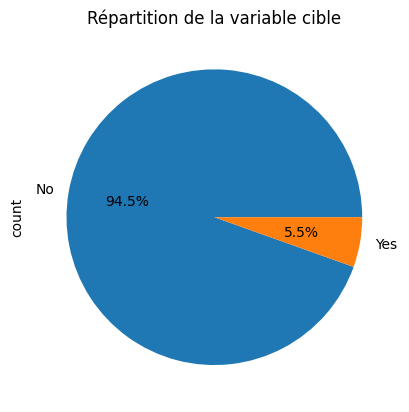

In [10]:
df["HadHeartAttack"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Répartition de la variable cible")

In [11]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


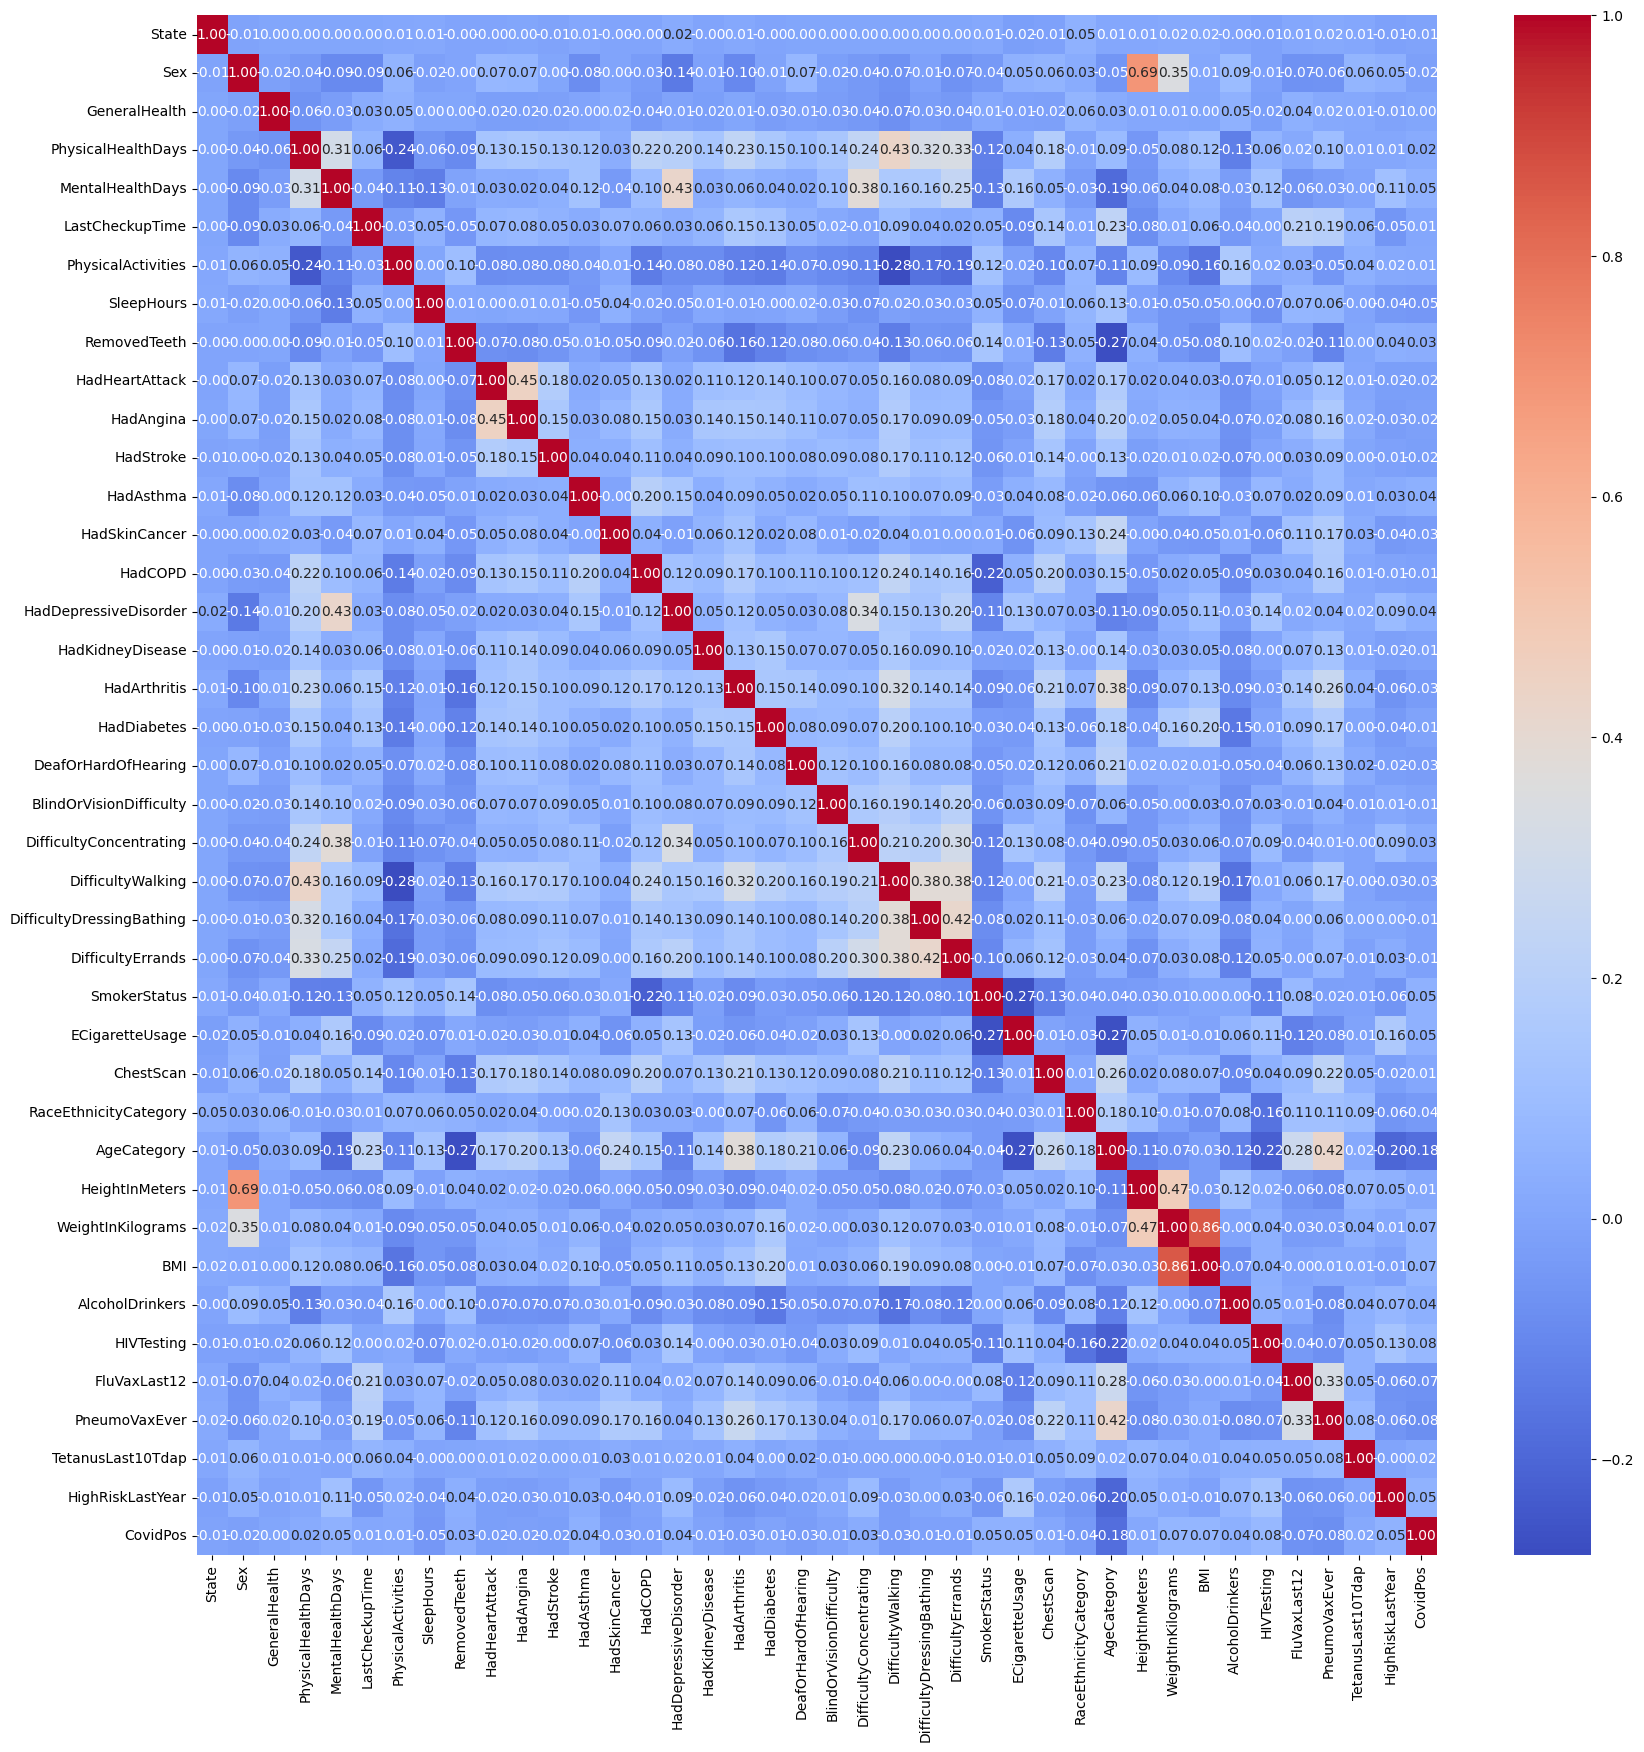

In [12]:
encoded_df = df.copy()
for column in encoded_df.columns:
    if encoded_df[column].dtype == object:
        encoded_df[column] = encoded_df[column].astype("category").cat.codes

plt.figure(figsize=(20, 20))
sns.heatmap(encoded_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column type is object
    if df[column].dtype == 'object':
        # Encode the column values
        df[column] = label_encoder.fit_transform(df[column])

# Print the encoded DataFrame
print(df)

        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0           0    0              4                 4.0               0.0   
1           0    1              4                 0.0               0.0   
2           0    1              4                 0.0               0.0   
3           0    0              1                 5.0               0.0   
4           0    0              2                 3.0              15.0   
...       ...  ...            ...                 ...               ...   
246017     48    1              4                 0.0               0.0   
246018     48    0              1                 0.0               7.0   
246019     48    1              2                 0.0              15.0   
246020     48    0              0                 2.0               2.0   
246021     48    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                     3   

In [14]:
df['HadHeartAttack'] #No : 0 , Yes : 1

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: HadHeartAttack, Length: 246022, dtype: int32

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [16]:
def get_classification_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print accuracy in predicting the 0 class
    print(f"Accuracy : {model.score(X_test, y_test)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [17]:
X = df.drop("HadHeartAttack", axis=1)
y = df["HadHeartAttack"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
get_classification_report(knn, X_train, X_test, y_train, y_test)

Accuracy : 0.9431354749549501
[[69540   269]
 [ 3928    70]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     69809
           1       0.21      0.02      0.03      3998

    accuracy                           0.94     73807
   macro avg       0.58      0.51      0.50     73807
weighted avg       0.91      0.94      0.92     73807



In [20]:
nb = GaussianNB()
get_classification_report(nb, X_train, X_test, y_train, y_test)

Accuracy : 0.8383622149660601
[[59074 10735]
 [ 1195  2803]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     69809
           1       0.21      0.70      0.32      3998

    accuracy                           0.84     73807
   macro avg       0.59      0.77      0.61     73807
weighted avg       0.94      0.84      0.88     73807



In [22]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
get_classification_report(xgb, X_train, X_test, y_train, y_test)

Accuracy : 0.9481214518948067
[[68981   828]
 [ 3001   997]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     69809
           1       0.55      0.25      0.34      3998

    accuracy                           0.95     73807
   macro avg       0.75      0.62      0.66     73807
weighted avg       0.94      0.95      0.94     73807



In [24]:
gradboost = GradientBoostingClassifier(random_state=0)
get_classification_report(gradboost, X_train, X_test, y_train, y_test)

Accuracy : 0.9492189087755903
[[69075   734]
 [ 3014   984]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     69809
           1       0.57      0.25      0.34      3998

    accuracy                           0.95     73807
   macro avg       0.77      0.62      0.66     73807
weighted avg       0.94      0.95      0.94     73807



In [28]:
adaboost = AdaBoostClassifier(random_state=0)
get_classification_report(adaboost, X_train, X_test, y_train, y_test)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 0.8952082721260023
[[62419  7487]
 [ 7137 62510]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     69906
           1       0.89      0.90      0.90     69647

    accuracy                           0.90    139553
   macro avg       0.90      0.90      0.90    139553
weighted avg       0.90      0.90      0.90    139553



In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest

In [27]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=42
)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
get_classification_report(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
get_classification_report(nb, X_train, X_test, y_train, y_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
get_classification_report(xgb, X_train, X_test, y_train, y_test)

gradboost = GradientBoostingClassifier(random_state=0)
get_classification_report(gradboost, X_train, X_test, y_train, y_test)

adaboost = AdaBoostClassifier(random_state=42)
get_classification_report(adaboost, X_train, X_test, y_train, y_test)

Accuracy : 0.8664880009745402
[[51295 18611]
 [   21 69626]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.85     69906
           1       0.79      1.00      0.88     69647

    accuracy                           0.87    139553
   macro avg       0.89      0.87      0.86    139553
weighted avg       0.89      0.87      0.86    139553

Accuracy : 0.8034796815546782
[[50901 19005]
 [ 8420 61227]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79     69906
           1       0.76      0.88      0.82     69647

    accuracy                           0.80    139553
   macro avg       0.81      0.80      0.80    139553
weighted avg       0.81      0.80      0.80    139553

Accuracy : 0.9611975378530021
[[68298  1608]
 [ 3807 65840]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     69906
           1       0.98      0.95      0.96     69647


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 0.8952082721260023
[[62419  7487]
 [ 7137 62510]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     69906
           1       0.89      0.90      0.90     69647

    accuracy                           0.90    139553
   macro avg       0.90      0.90      0.90    139553
weighted avg       0.90      0.90      0.90    139553



In [30]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
get_classification_report(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
get_classification_report(nb, X_train, X_test, y_train, y_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
get_classification_report(xgb, X_train, X_test, y_train, y_test)

gradboost = GradientBoostingClassifier(random_state=0)
get_classification_report(gradboost, X_train, X_test, y_train, y_test)

adaboost = AdaBoostClassifier(random_state=42)
get_classification_report(adaboost, X_train, X_test, y_train, y_test)

Accuracy : 0.6834139684902617
[[2722 1296]
 [1256 2787]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4018
           1       0.68      0.69      0.69      4043

    accuracy                           0.68      8061
   macro avg       0.68      0.68      0.68      8061
weighted avg       0.68      0.68      0.68      8061

Accuracy : 0.7807964272422776
[[3237  781]
 [ 986 3057]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4018
           1       0.80      0.76      0.78      4043

    accuracy                           0.78      8061
   macro avg       0.78      0.78      0.78      8061
weighted avg       0.78      0.78      0.78      8061

Accuracy : 0.7951867014018111
[[3204  814]
 [ 837 3206]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      4018
           1       0.80      0.79      0.80      4043

    accurac

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 0.7963031881900509
[[3331  687]
 [ 955 3088]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      4018
           1       0.82      0.76      0.79      4043

    accuracy                           0.80      8061
   macro avg       0.80      0.80      0.80      8061
weighted avg       0.80      0.80      0.80      8061



In [ ]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)
bbc.fit(X_train, y_train)

In [ ]:
iforest = IsolationForest(contamination='auto', behaviour='new')
iforest.fit(X_train)